# Model Evaluation

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

### Preprocessing the Training set

In [2]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 2000 images belonging to 2 classes.


### Evaluate the Model's Performance on the Test Set

In [6]:
model = load_model('cnn_model.keras')

test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8011 - loss: 0.4863
Test Loss: 0.48221081495285034
Test Accuracy: 0.7935000061988831


## Confusion Matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
Confusion Matrix:
[[792 208]
 [205 795]]


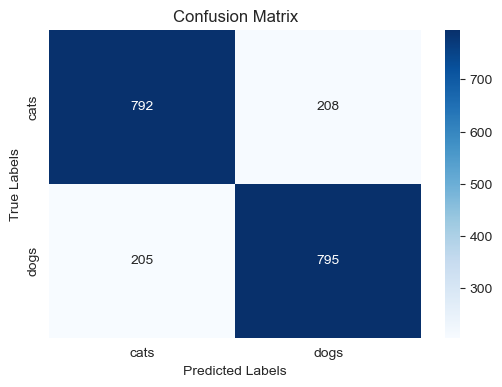

In [7]:
# Generate predictions for the test set
predictions = model.predict(test_set)
# Convert probabilities to binary classes (0 or 1)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)

# Get true class labels
true_classes = test_set.classes
# Get class labels ( ['cats', 'dogs'])
class_labels = list(test_set.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Generate Classification Report

In [8]:
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

        cats       0.79      0.79      0.79      1000
        dogs       0.79      0.80      0.79      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

